In [60]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.spatial import distance
import random

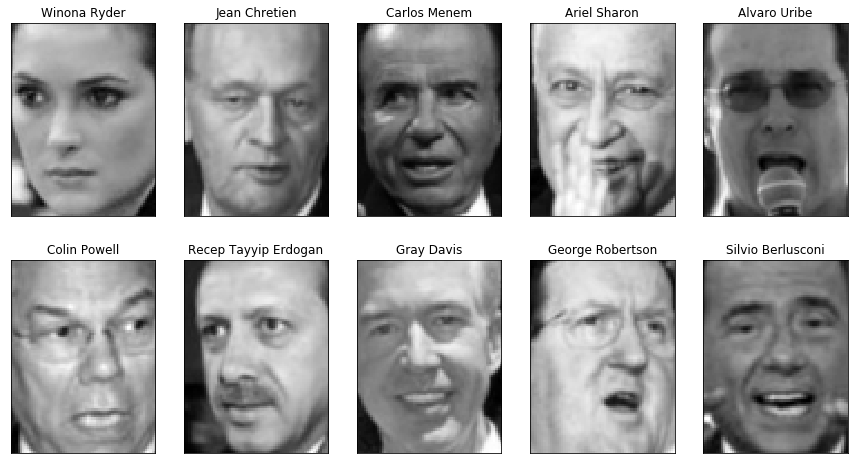

In [61]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize = (15 , 8), subplot_kw = {'xticks': ( ), 'yticks': ( )})
for target, image, ax in zip(people.target, people.images, axes.ravel( )):
    ax.imshow(image, cmap = cm.gray)
    ax.set_title(people.target_names[target])

In [62]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

counts = np.bincount(people.target)

for i, (count,name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end = ' ')
    if(i+1)%3 == 0:
        print() 

mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][0:50]] = 1

X_people = people.data[mask]
Y_people = people.target[mask]

X_people = X_people / 255

people.images.shape: (3023, 87, 65)
Number of classes: 62
Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 Jo

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.spatial import distance

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X_people, Y_people, stratify = Y_people, random_state = 0)

In [64]:
def KMA(Z,centroids,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10):
    
    dista = []
    
    
    


        #print(X_train[0])
        # for i in range(0,10):
        #     centroids[i] = random.choice(X_train)
        # print(cenroids)
    for i in range(len(Z)):
            for j in range(len(centroids)):
                dist = distance.euclidean(Z[i],centroids[j])
                dista.append(dist)
            min_dist_ind = np.argmin(dista)

            if(min_dist_ind==0):
                c1.append(Z[i])
                centroids[0]=np.mean(c1, axis=0)
            elif(min_dist_ind==1):
                c2.append(Z[i])
                centroids[1]=np.mean(c2, axis=0)
            elif(min_dist_ind==2):
                c3.append(Z[i])
                centroids[2]=np.mean(c3, axis=0)
            elif(min_dist_ind==3):
                c4.append(Z[i])
                centroids[3]=np.mean(c4, axis=0)
            elif(min_dist_ind==4):
                c5.append(Z[i])
                centroids[4]=np.mean(c5, axis=0)
            elif(min_dist_ind==5):
                c6.append(Z[i])
                centroids[5]=np.mean(c6, axis=0)
            elif(min_dist_ind==6):
                c7.append(Z[i])
                centroids[6]=np.mean(c7, axis=0)
            elif(min_dist_ind==7):
                c8.append(Z[i])
                centroids[7]=np.mean(c8, axis=0)
            elif(min_dist_ind==8):
                c9.append(Z[i])
                centroids[8]=np.mean(c9, axis=0)
            elif(min_dist_ind==9):
                c10.append(Z[i])
                centroids[9]=np.mean(c10, axis=0)
            dista.clear()

    


    return c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,centroids

In [65]:
X_train_std = (X_train - np.mean(X_train, axis = 0))/np.std(X_train, axis =0, ddof = 1)

def PCA(X_train_std):        
    X_train_transpose = X_train_std.transpose()
    X_train_new = np.dot(X_train_transpose, X_train_std) / (len(X_train_std)-1)
    X_train_new_rows, X_train_new_cols = X_train_new.shape
    
    val, vec = np.linalg.eig(X_train_new)
    return val, vec, X_train_new

eig_val, eig_vec, X_train_new = PCA(X_train_std)


In [66]:
sorted_values_ind = eig_val.argsort()[::-1]
val_desc = eig_val[sorted_values_ind]
val_100 = val_desc[: 100]
vec_desc = eig_vec[:, sorted_values_ind]
vec_100 = vec_desc[: , :100]

Z = np.dot(X_train_std, vec_100)



In [67]:
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
c6=[]
c7=[]
c8=[]
c9=[]
c10=[]
centroids = []
prev_sum = []
for m in range(0,100):
    prev_sum.append(0)

new_sum = 0 

    


for i in range(0,10):
    rand_index = np.random.randint(len(Z))
    centroids.append(Z[rand_index])
    
prev_change = 0    
for k in range(0,10000):
    c1.clear()
    c2.clear()
    c3.clear()
    c4.clear()
    c5.clear()
    c6.clear()
    c7.clear()
    c8.clear()
    c9.clear()
    c10.clear()
    
    c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,centroids= KMA(Z,centroids,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10)
    
    # mag_change = np.abs(change) - np.abs(prev_change)
    # prev_change = change
    change = 0

    for m in range(len(centroids)):
        new_sum += centroids[m]

    for l in range(len(new_sum)):    
        change += np.abs(new_sum[l] - prev_sum[l])
    prev_sum = new_sum

    if change < pow(2,-23):
        break
    
#print(min_dist_ind)

In [68]:
print("Cluster 1 = {}".format(len(c1)))
print("Cluster 2 = {}".format(len(c2)))
print("Cluster 3 = {}".format(len(c3)))
print("Cluster 4 = {}".format(len(c4)))
print("Cluster 5 = {}".format(len(c5)))
print("Cluster 6 = {}".format(len(c6)))
print("Cluster 7 = {}".format(len(c7)))
print("Cluster 8 = {}".format(len(c8)))
print("Cluster 9 = {}".format(len(c9)))
print("Cluster 10 = {}".format(len(c10)))

Cluster 1 = 94
Cluster 2 = 207
Cluster 3 = 344
Cluster 4 = 165
Cluster 5 = 1
Cluster 6 = 73
Cluster 7 = 126
Cluster 8 = 138
Cluster 9 = 268
Cluster 10 = 131


In [69]:
cent1 = np.dot(centroids[0], vec_100.transpose())
cent2 = np.dot(centroids[1], vec_100.transpose())
cent3 = np.dot(centroids[2], vec_100.transpose())
cent4 = np.dot(centroids[3], vec_100.transpose())
cent5 = np.dot(centroids[4], vec_100.transpose())
cent6 = np.dot(centroids[5], vec_100.transpose())
cent7 = np.dot(centroids[6], vec_100.transpose())
cent8 = np.dot(centroids[7], vec_100.transpose())
cent9 = np.dot(centroids[8], vec_100.transpose())
cent10 = np.dot(centroids[9], vec_100.transpose())

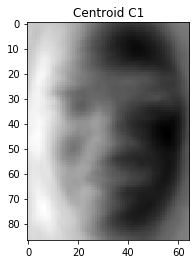

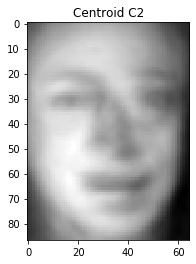

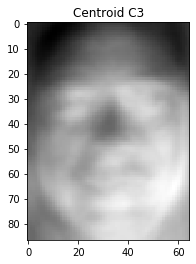

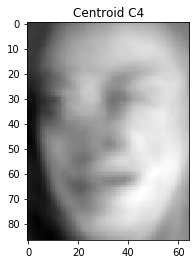

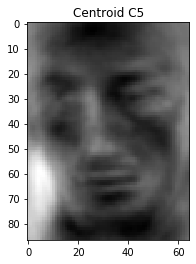

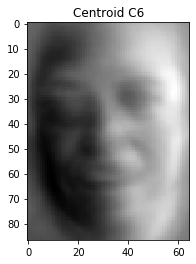

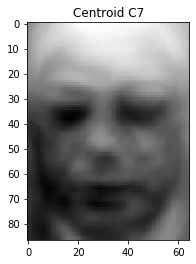

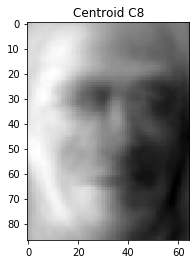

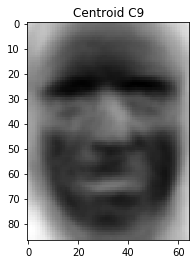

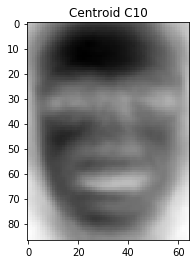

In [77]:
plt.title("Centroid C1")
plt.imshow(np.reshape(cent1, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Centroid C2")
plt.imshow(np.reshape(cent2, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Centroid C3")
plt.imshow(np.reshape(cent3, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Centroid C4")
plt.imshow(np.reshape(cent4, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Centroid C5")
plt.imshow(np.reshape(cent5, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Centroid C6")
plt.imshow(np.reshape(cent6, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Centroid C7")
plt.imshow(np.reshape(cent7, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Centroid C8")
plt.imshow(np.reshape(cent8, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Centroid C9")
plt.imshow(np.reshape(cent9, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Centroid C10")
plt.imshow(np.reshape(cent10, (87,65)), cmap = cm.gray)
plt.show()

In [71]:
def closest_furthest(centroids,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10):
    dista = []
    for i in range(len(c1)):
        dist = distance.euclidean(c1[i],centroids[0])
        dista.append(dist)
    c1_max_ind = np.argmax(dista)
    c1_min_ind = np.argmin(dista)
    dista.clear()
    f1 = c1[c1_max_ind]
    cl1 = c1[c1_min_ind]
    for i in range(len(c2)):
        dist = distance.euclidean(c2[i],centroids[1])
        dista.append(dist)
    c2_max_ind = np.argmax(dista)
    c2_min_ind = np.argmin(dista)
    dista.clear()
    f2 = c2[c2_max_ind]
    cl2 = c2[c2_min_ind]
    for i in range(len(c3)):
        dist = distance.euclidean(c3[i],centroids[2])
        dista.append(dist)
    c3_max_ind = np.argmax(dista)
    c3_min_ind = np.argmin(dista)
    dista.clear()
    f3 = c3[c3_max_ind]
    cl3 = c3[c3_min_ind]
    for i in range(len(c4)):
        dist = distance.euclidean(c4[i],centroids[3])
        dista.append(dist)
    c4_max_ind = np.argmax(dista)
    c4_min_ind = np.argmin(dista)
    dista.clear()
    f4 = c4[c4_max_ind]
    cl4 = c4[c4_min_ind]
    for i in range(len(c5)):
        dist = distance.euclidean(c5[i],centroids[4])
        dista.append(dist)
    c5_max_ind = np.argmax(dista)
    c5_min_ind = np.argmin(dista)
    dista.clear()
    f5 = c5[c5_max_ind]
    cl5 = c5[c5_min_ind]
    for i in range(len(c6)):
        dist = distance.euclidean(c6[i],centroids[5])
        dista.append(dist)
    c6_max_ind = np.argmax(dista)
    c6_min_ind = np.argmin(dista)
    dista.clear()
    f6 = c6[c6_max_ind]
    cl6 = c6[c6_min_ind]
    for i in range(len(c7)):
        dist = distance.euclidean(c7[i],centroids[6])
        dista.append(dist)
    c7_max_ind = np.argmax(dista)
    c7_min_ind = np.argmin(dista)
    dista.clear()
    f7 = c7[c7_max_ind]
    cl7 = c7[c7_min_ind]
    for i in range(len(c8)):
        dist = distance.euclidean(c8[i],centroids[7])
        dista.append(dist)
    c8_max_ind = np.argmax(dista)
    c8_min_ind = np.argmin(dista)
    dista.clear()
    f8 = c8[c8_max_ind]
    cl8 = c8[c8_min_ind]
    for i in range(len(c9)):
        dist = distance.euclidean(c9[i],centroids[8])
        dista.append(dist)
    c9_max_ind = np.argmax(dista)
    c9_min_ind = np.argmin(dista)
    dista.clear()
    f9 = c9[c9_max_ind]
    cl9 = c9[c9_min_ind]
    for i in range(len(c10)):
        dist = distance.euclidean(c10[i],centroids[9])
        dista.append(dist)
    c10_max_ind = np.argmax(dista)
    c10_min_ind = np.argmin(dista)
    dista.clear()
    f10 = c10[c10_max_ind]
    cl10 = c10[c10_min_ind]
    return f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,cl1,cl2,cl3,cl4,cl5,cl6,cl7,cl8,cl9,cl10

In [72]:
f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,cl1,cl2,cl3,cl4,cl5,cl6,cl7,cl8,cl9,cl10 = closest_furthest(centroids,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10)


In [73]:
fp1 = np.dot(f1, vec_100.transpose())
fp2 = np.dot(f2, vec_100.transpose())
fp3 = np.dot(f3, vec_100.transpose())
fp4 = np.dot(f4, vec_100.transpose())
fp5 = np.dot(f5, vec_100.transpose())
fp6 = np.dot(f6, vec_100.transpose())
fp7 = np.dot(f7, vec_100.transpose())
fp8 = np.dot(f8, vec_100.transpose())
fp9 = np.dot(f9, vec_100.transpose())
fp10 = np.dot(f10, vec_100.transpose())
clp1 = np.dot(cl1, vec_100.transpose())
clp2 = np.dot(cl2, vec_100.transpose())
clp3 = np.dot(cl3, vec_100.transpose())
clp4 = np.dot(cl4, vec_100.transpose())
clp5 = np.dot(cl5, vec_100.transpose())
clp6 = np.dot(cl6, vec_100.transpose())
clp7 = np.dot(cl7, vec_100.transpose())
clp8 = np.dot(cl8, vec_100.transpose())
clp9 = np.dot(cl9, vec_100.transpose())
clp10 = np.dot(cl10, vec_100.transpose())

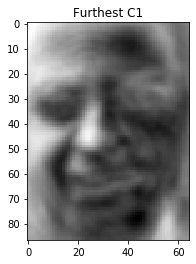

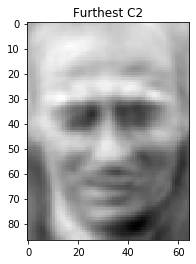

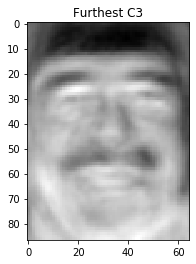

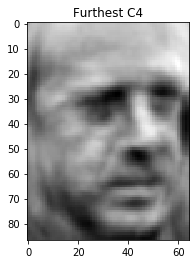

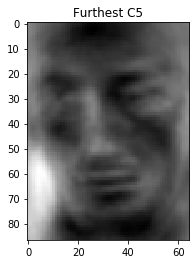

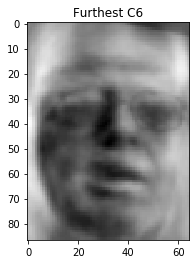

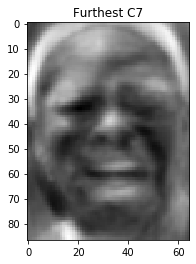

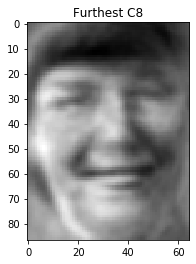

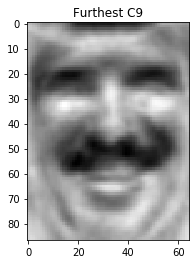

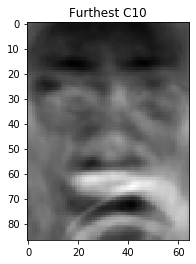

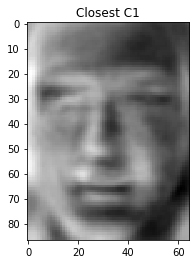

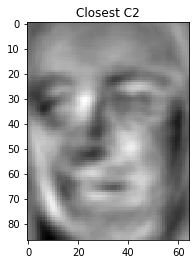

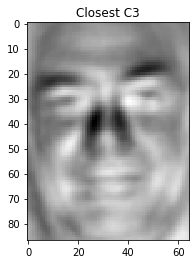

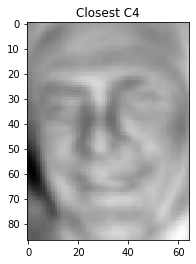

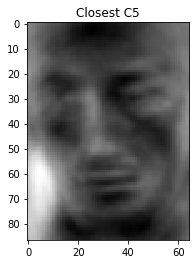

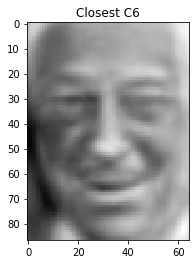

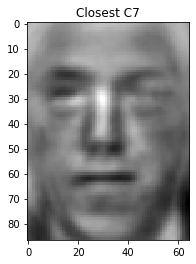

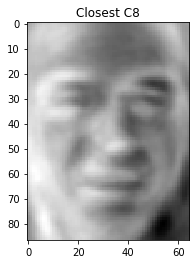

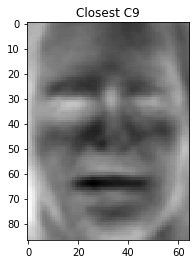

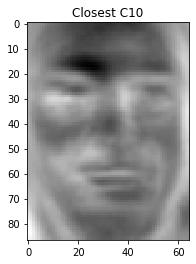

In [76]:
plt.title("Furthest C1")
plt.imshow(np.reshape(fp1, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Furthest C2")
plt.imshow(np.reshape(fp2, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Furthest C3")
plt.imshow(np.reshape(fp3, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Furthest C4")
plt.imshow(np.reshape(fp4, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Furthest C5")
plt.imshow(np.reshape(fp5, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Furthest C6")
plt.imshow(np.reshape(fp6, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Furthest C7")
plt.imshow(np.reshape(fp7, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Furthest C8")
plt.imshow(np.reshape(fp8, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Furthest C9")
plt.imshow(np.reshape(fp9, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Furthest C10")
plt.imshow(np.reshape(fp10, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Closest C1")
plt.imshow(np.reshape(clp1, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Closest C2")
plt.imshow(np.reshape(clp2, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Closest C3")
plt.imshow(np.reshape(clp3, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Closest C4")
plt.imshow(np.reshape(clp4, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Closest C5")
plt.imshow(np.reshape(clp5, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Closest C6")
plt.imshow(np.reshape(clp6, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Closest C7")
plt.imshow(np.reshape(clp7, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Closest C8")
plt.imshow(np.reshape(clp8, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Closest C9")
plt.imshow(np.reshape(clp9, (87,65)), cmap = cm.gray)
plt.show()

plt.title("Closest C10")
plt.imshow(np.reshape(clp10, (87,65)), cmap = cm.gray)
plt.show()